In [10]:
import os
os.environ["PATH"] += ":/usr/local/texlive/2024/bin/universal-darwin"

from plotting_helpers import add_energy_legends,add_runtime_legends, add_gridlines, set_x_ticks

import numpy as np
import matplotlib.pylab as plt

In [11]:
import sys
sys.path.append('../')
from utils import step_schedule_exp_decay as exp_decay_imported
from helpers import save_dict,load_dict


In [12]:
from scipy.optimize import curve_fit

In [13]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 15,
    "font.family": "Helvetica"

})


column_width = 3.75
square_fig_size=(2*column_width,3/2*column_width)


# Helper Functions

In [14]:
def fourth_order(x, c1, c2, c3, c4, cy):
    return cy + c1 * x + c2 * x**2 + c3 * x**3 + c4 * x**4

# Load Data

In [15]:
scales = [0.25,0.5,1.,2.,4.]
rates = [0.25,0.475]

Ls_1 = np.arange(6,21,2)
Ls_2 = np.arange(24,33,4)
Ls_all = np.concatenate((Ls_1,Ls_2),axis=0)


In [16]:
data = load_dict('./final_data/runtimes_data.pkl')

# Plot

In [17]:
colorscale = plt.get_cmap('plasma')
shades = np.linspace(0.,0.9,len(scales)+1)[::-1][:-1]
colors = colorscale(shades)
markers = {0.475:'s',0.25:'8'}
markersizes = {0.475:6,0.25:8}
alphas = {0.475:0.5,0.25:1.0}
linestyles= {0.475:'--',0.25:'-'}
bigger_font_size = 22

greys = plt.get_cmap('Greys')
scales_rescaled = np.array(scales)/max(np.array(scales))
grey_colors = greys(scales_rescaled)

### Number of steps as a function of L

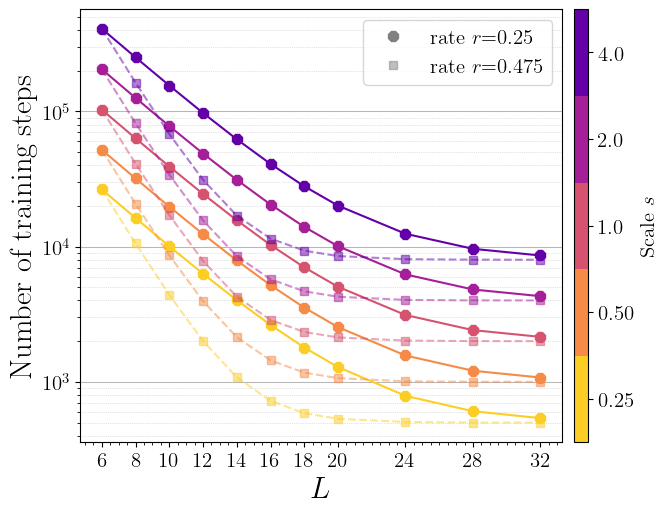

In [18]:
fig, ax = plt.subplots(figsize=square_fig_size)

for rate_i,rate in enumerate(rates):
    for scale_i,scale in enumerate(scales):
        plot_Ls = []
        steps_per_L = []
        for L_i,L in enumerate(Ls_all):
            plot_Ls.append(L)
            steps = exp_decay_imported(L,scale=scale,rate=rate)
            steps_rounded = int(np.floor(steps/100)*100)
            steps_per_L.append(steps)

            total_steps = np.sum(np.array(steps_per_L))
            # print(f"{scale},{rate},{L}: {total_steps}")
        
        if scale_i==0:
            plt.errorbar(plot_Ls,steps_per_L,c=colors[scale_i],
                        markersize=markersizes[rate],marker=markers[rate],alpha=alphas[rate],linestyle=linestyles[rate],
                        label=f'rate={rate}')
        else:
            plt.errorbar(plot_Ls,steps_per_L,color=colors[scale_i],
                        markersize=markersizes[rate],marker=markers[rate],alpha=alphas[rate],linestyle=linestyles[rate])

set_x_ticks(ax)
add_gridlines(axes='y')
add_energy_legends(show_runs=True)
plt.ylabel("Number of training steps",fontsize=bigger_font_size)
plt.xlabel("$L$",fontsize=bigger_font_size)
plt.yscale('log')

plt.savefig('./final_figures/num_training_steps.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

### Train time as a function of L

##### Time per step per L

In [19]:
which_bc = 'periodic'
rate = 0.475
scale = 1.0
plot_ls = []
plot_times = []
open_plot_times = []

for l_i,key in enumerate(data[which_bc][f'rate={rate}'][f'scale={scale}'].keys()):
    print(key)
    if 'mean time per step' in data[which_bc][f'rate={rate}'][f'scale={scale}'][key].keys():
        plot_ls.append(Ls_all[l_i])
        plot_times.append(data[which_bc][f'rate={rate}'][f'scale={scale}'][key]['mean time per step'])

print(plot_ls)

L=6
L=8
L=10
L=12
L=14
L=16
L=18
L=20
L=24
L=28
L=32
[6, 8, 10, 12, 14, 16, 18, 20, 24, 28, 32]


[ 0.05822389 -0.00504287  0.00044222  0.00018841 -0.06500493]
coeff for third order:  0.00044221843195513255
coeff for fourth order: 0.00018841454207030317
intercept:             -0.06500493234294225


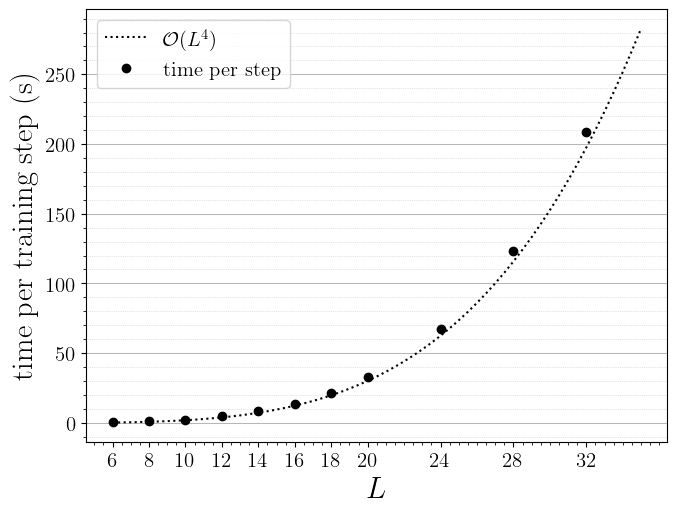

In [20]:
fig,ax = plt.subplots(figsize=square_fig_size)

plot_ls_np = np.array(plot_ls)
plot_times_np = np.array(plot_times)

plt.errorbar(plot_ls_np,plot_times_np,label='time per step',color='k',fmt='o')

params, covariance = curve_fit(fourth_order, plot_ls_np, plot_times_np)
x_mesh = np.arange(min(plot_ls_np),1.1*max(plot_ls_np),0.5)
# plt.plot(x_mesh,fourth_order(x_mesh,params[0],params[1],params[2],params[3],params[4]),color='k',linestyle='--')
plt.plot(x_mesh,fourth_order(x_mesh,0,0,0,params[3],params[4]),color='k',linestyle=':',label='$\mathcal{O}(L^4)$')

print(params)
print(f"coeff for third order:  {params[2]}")
print(f"coeff for fourth order: {params[3]}")
print(f"intercept:             {params[4]}")

set_x_ticks(ax)
add_gridlines(axes='y')

plt.xlabel("$L$",fontsize=bigger_font_size)
plt.ylabel("time per training step (s)",fontsize=bigger_font_size)
plt.legend()

plt.savefig('./final_figures/time_per_L.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

##### Total run time up to L

Estimated run time for 0.25,0.25 = 7.812006322626308 hrs on 4 GPUs
Estimated run time for 0.25,0.475 = 7.246759111898244 hrs on 4 GPUs
Estimated run time for 0.5,0.25 = 15.595025608805022 hrs on 4 GPUs
Estimated run time for 0.5,0.475 = 14.493518223796489 hrs on 4 GPUs
Estimated run time for 1.0,0.25 = 31.175557699386246 hrs on 4 GPUs
Estimated run time for 1.0,0.475 = 28.987036447592978 hrs on 4 GPUs
Estimated run time for 2.0,0.25 = 62.35111539877249 hrs on 4 GPUs
Estimated run time for 2.0,0.475 = 57.974072895185955 hrs on 4 GPUs
Estimated run time for 4.0,0.25 = 124.6732437610974 hrs on 4 GPUs
Estimated run time for 4.0,0.475 = 115.96263930859571 hrs on 4 GPUs


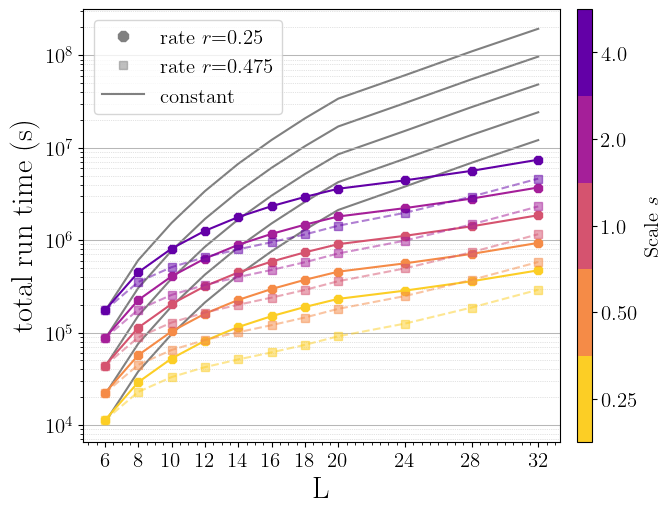

In [21]:
fig, ax = plt.subplots(figsize=square_fig_size)

for scale_i,scale in enumerate(scales):
    for rate in rates:

        decay = np.array([exp_decay_imported(l,scale=scale,rate=rate) for l in plot_ls_np])
        decay_runtimes = []
        num_steps_prev = 0
        amt_run_time_prev = 0
        for l_i,l in enumerate(plot_ls_np):
            num_new_steps = decay[l_i] 
            new_run_time = num_new_steps * plot_times[l_i]
            decay_runtimes.append(amt_run_time_prev + new_run_time)
            num_steps_prev += num_new_steps
            amt_run_time_prev += new_run_time
            if l==32:
                print(f"Estimated run time for {scale},{rate} = {new_run_time/(60*60*4)} hrs on 4 GPUs")

        plt.plot(plot_ls_np,decay_runtimes,color=colors[scale_i],
        alpha=alphas[rate],marker=markers[rate],linestyle=linestyles[rate],
        label=f'rate={rate}, scale={scale}',)
        
    no_decay_scale = 100000 * scale
    no_decay_scale_runtimes = []
    num_steps_prev = 0
    amt_run_time_prev = 0
    for l_i,l in enumerate(plot_ls_np):
        num_new_steps =no_decay_scale
        new_run_time = num_new_steps * plot_times[l_i]
        no_decay_scale_runtimes.append(amt_run_time_prev + new_run_time)
        num_steps_prev += num_new_steps
        amt_run_time_prev += new_run_time

    plt.plot(plot_ls_np,no_decay_scale_runtimes,color='grey',label=f'constant,scale={scale}',zorder=-1)
    
set_x_ticks(ax)
add_gridlines(axes='y')
add_runtime_legends()

plt.yscale('log')
plt.ylabel("total run time (s)",fontsize=bigger_font_size)
plt.xlabel("L",fontsize=bigger_font_size)

plt.savefig('./final_figures/run_times.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()